In [131]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
import os
tf.__version__
tf.random.set_seed(123)

In [132]:
# Adding data paths
parent_dir = r'E:\datasets\pneumonia_kaggle'
train_dir = os.path.join(parent_dir,'train')
test_dir = os.path.join(parent_dir,'test')
val_dir = os.path.join(parent_dir,'val')
save_dir = r'D:\Projects\Pneumonia Kaggle\model'

In [133]:
# Setting parameters
batch_size = 32
img_height = 450
img_width = 450
epochs = 7

In [134]:
# Converting data directory to a training set
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    shuffle=True,
    labels='inferred',
    color_mode='grayscale',
    seed=123,
    label_mode='binary',
    image_size=(img_height, img_width),
    batch_size=batch_size)

Found 5216 files belonging to 2 classes.


In [135]:
# Converting data directory to a validation set
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    val_dir,
    shuffle=True,
    labels='inferred',
    color_mode='grayscale',
    seed=123,
    label_mode='binary',
    image_size=(img_height, img_width),
    batch_size=batch_size)

Found 16 files belonging to 2 classes.


In [136]:
# Converting data directory to a test set
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    test_dir,
    labels='inferred',
    color_mode='grayscale',
    seed=123,
    label_mode='binary',
    image_size=(img_height, img_width))

Found 624 files belonging to 2 classes.


In [137]:
# Getting class names
class_names = train_ds.class_names
print(class_names)

['NORMAL', 'PNEUMONIA']


In [138]:
# Normalizing colors
normalization_layer = tf.keras.layers.experimental.preprocessing.Rescaling(1./255)
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
print(np.min(first_image), np.max(first_image))

0.004275114 0.832807


In [145]:
# Structuring the model
num_classes = len(class_names)

callback = [tf.keras.callbacks.EarlyStopping(monitor='loss', min_delta=0.001, patience=1, verbose=1, restore_best_weights=True),
            tf.keras.callbacks.ModelCheckpoint(r'{}\pneumonia_7e_binary_gray.h5'.format(save_dir))]
model = keras.models.Sequential()
model.add(layers.experimental.preprocessing.Rescaling(1./255))
model.add(layers.Conv2D(32,3, activation='relu', input_shape=(img_width,img_height,1)))
model.add(layers.MaxPool2D())
model.add(layers.Conv2D(32,3,activation='relu'))
model.add(layers.MaxPool2D())
model.add(layers.Flatten())
model.add(layers.Dense(1, activation='sigmoid'))
# model.add(layers.Dense(num_classes))

In [146]:
model.compile(
              optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

In [147]:
# Fitting the model
history = model.fit(
                    train_ds,
                    validation_data=val_ds,
                    epochs=epochs,
                    callbacks=[callback])

Epoch 1/7
163/163 [==============================] - 1187s 7s/step - loss: 0.5042 - accuracy: 0.8089 - val_loss: 0.4318 - val_accuracy: 0.6875
Epoch 2/7
163/163 [==============================] - 1227s 7s/step - loss: 0.0923 - accuracy: 0.9656 - val_loss: 0.1234 - val_accuracy: 0.9375
Epoch 3/7
163/163 [==============================] - 1208s 7s/step - loss: 0.0610 - accuracy: 0.9777 - val_loss: 0.0857 - val_accuracy: 1.0000
Epoch 4/7
163/163 [==============================] - 1135s 7s/step - loss: 0.0408 - accuracy: 0.9882 - val_loss: 0.0428 - val_accuracy: 1.0000
Epoch 5/7
163/163 [==============================] - 1140s 7s/step - loss: 0.0293 - accuracy: 0.9884 - val_loss: 0.1209 - val_accuracy: 0.8750
Epoch 6/7
163/163 [==============================] - 1147s 7s/step - loss: 0.0130 - accuracy: 0.9974 - val_loss: 0.1287 - val_accuracy: 0.9375
Epoch 7/7
163/163 [==============================] - 1112s 7s/step - loss: 0.0101 - accuracy: 0.9964 - val_loss: 0.0425 - val_accuracy: 1.0000

In [149]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_12 (Rescaling)     (None, 450, 450, 1)       0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 448, 448, 32)      320       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 224, 224, 32)      0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 222, 222, 32)      9248      
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 111, 111, 32)      0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 394272)            0         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                

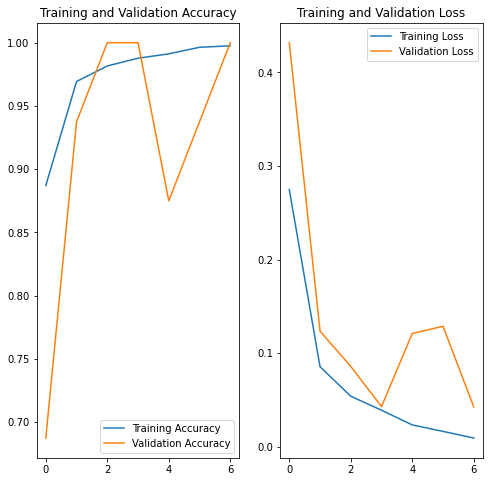

In [150]:
# Plotting model performance
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [148]:
# Save model
model.save('{}\pneumonia_7e_all_binary_gray.h5'.format(save_dir))

In [151]:
# model = keras.models.load_model('{}\pneumonia_5e_binary_gray.h5'.format(save_dir))

In [89]:
# Normalizing test colors
normalization_test_layer = tf.keras.layers.experimental.preprocessing.Rescaling(1./255)
normalized_test_ds = test_ds.map(lambda x, y: (normalization_test_layer(x), y))
# image_test_batch, labels_test_batch = next(iter(normalized_test_ds))
# first_test_image = image_test_batch[0]
# print(np.min(first_test_image), np.max(first_test_image))

In [152]:
# Getting x and y from the test set
test_preds = []
y_test = []
for x,y in normalized_test_ds:
    test_pred = model.predict(x)
    # x_test.append(x)
    # y_test.append(y)
    test_preds.extend(test_pred)
    y_test.extend(y)

preds = np.array(test_preds)
y_pred = np.where(preds > 0.5, 1, 0)
y_test = np.array(y_test)

In [153]:
# Assessing model performance using confusion matrix
from sklearn.metrics import confusion_matrix

cm  = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()

precision = tp/(tp+fp)
recall = tp/(tp+fn)
f1 = 2*((precision * recall)/(precision + recall))

print("Recall of the model is {:.2f}".format(recall))
print("Precision of the model is {:.2f}".format(precision))
print("F1-score of the model is {:.2f}".format(f1))

Recall of the model is 1.00
Precision of the model is 0.62
F1-score of the model is 0.77


In [154]:
# Predict
# E:\Downloads\chest pneumonia.jpg
img = keras.preprocessing.image.load_img(r"E:\datasets\pneumonia_kaggle\test\NORMAL\IM-0063-0001.jpeg",
                                         target_size=(img_width, img_height),
                                         color_mode='grayscale')
img_array = keras.preprocessing.image.img_to_array(img)
print(img_array.shape)
img_array = tf.expand_dims(img_array, 0)  # Create batch axis
print(img_array.shape)
predictions = model.predict(img_array)
score = predictions[0]
print("This image is %.2f percent normal and %.2f percent pneumonia." % (100 * (1 - score), 100 * score))

(450, 450, 1)
(1, 450, 450, 1)
This image is 0.49 percent normal and 99.51 percent pneumonia.


This means that the model overfits the data.